In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
sns.set_palette("pastel")

In [2]:
train = pd.read_csv("new_cats_train.csv")
test = pd.read_csv("new_cats_test.csv")

dfs = [train,test]

train.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Age_Bin_Qcut,Age_Bin_Ncut,Log_Fare,Is_Child,Fare_Bin,Cabin_Code,Title,Surname,Name_Len,People_In_Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,"(20.0, 25.0]","(16.336, 32.252]",1.981001,0,"(-0.001, 7.91]",U,Mr,Braund,23,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,"(30.0, 40.0]","(32.252, 48.168]",4.266662,0,"(31.0, 512.329]",C,Mrs,Cumings,51,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,"(25.0, 30.0]","(16.336, 32.252]",2.070022,0,"(7.91, 14.454]",U,Miss,Heikkinen,22,1


In [3]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for df in dfs:
    df["Sex_C"] = label.fit_transform(df["Sex"])
    df["Embarked_C"] = label.fit_transform(df["Embarked"])
    df["Title_C"] = label.fit_transform(df["Title"])
    df["Age_QC"] = label.fit_transform(df["Age_Bin_Qcut"])
    df["Age_NC"] = label.fit_transform(df["Age_Bin_Ncut"])
    df["Fare_C"] = label.fit_transform(df["Fare_Bin"])
    df["Cabin_C"] = label.fit_transform(df["Cabin_Code"])

train.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Surname,Name_Len,People_In_Ticket,Sex_C,Embarked_C,Title_C,Age_QC,Age_NC,Fare_C,Cabin_C
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,Braund,23,1,1,2,2,1,1,0,8
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,Cumings,51,2,0,0,3,3,2,2,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,Heikkinen,22,1,0,2,1,2,1,3,8


Text(0.5, 1.0, 'Correlation between columns')

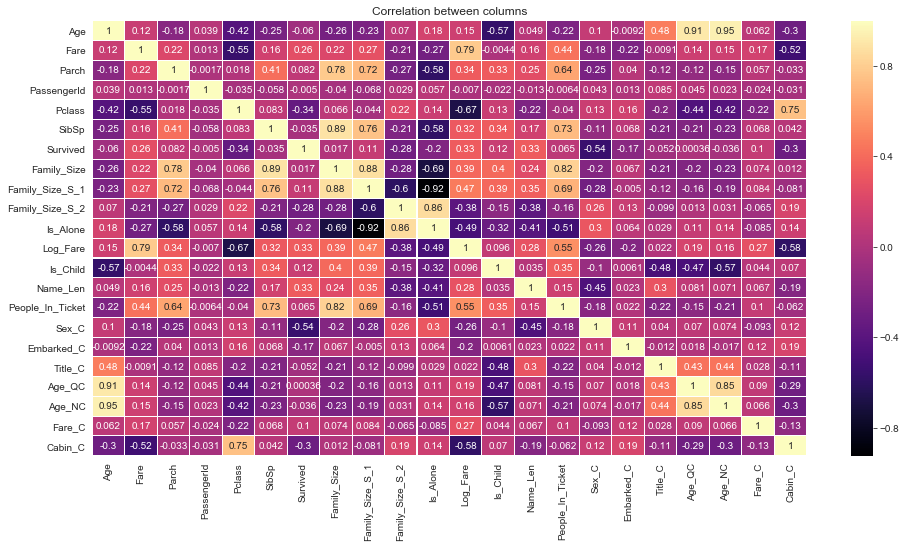

In [4]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,cmap="magma",lw=.1)
plt.title("Correlation between columns")

Best correlations with Survived:<br>
+: Log_Fare and Name_len<br>
-: Sex, Pclass, Family_Size_S_2 and Cabin_C

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
Age                 891 non-null float64
Cabin               204 non-null object
Embarked            891 non-null object
Fare                891 non-null float64
Name                891 non-null object
Parch               891 non-null int64
PassengerId         891 non-null int64
Pclass              891 non-null int64
Sex                 891 non-null object
SibSp               891 non-null int64
Survived            891 non-null int64
Ticket              891 non-null object
Family_Size         891 non-null int64
Family_Size_S_1     891 non-null int64
Family_Size_S_2     891 non-null int64
Is_Alone            891 non-null int64
Age_Bin_Qcut        891 non-null object
Age_Bin_Ncut        891 non-null object
Log_Fare            891 non-null float64
Is_Child            891 non-null int64
Fare_Bin            891 non-null object
Cabin_Code          891 non-null object
Title               89

In [6]:
X = train[["Age","Fare","Parch","Pclass","SibSp","Family_Size","Family_Size_S_1","Family_Size_S_2","Is_Alone",
           "Log_Fare","Is_Child","Name_Len","People_In_Ticket","Sex_C","Embarked_C","Title_C","Age_QC",
           "Age_NC","Fare_C","Cabin_C"]]

target = "Survived"
y = train[target]

X.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Family_Size_S_1,Family_Size_S_2,Is_Alone,Log_Fare,Is_Child,Name_Len,People_In_Ticket,Sex_C,Embarked_C,Title_C,Age_QC,Age_NC,Fare_C,Cabin_C
0,22.0,7.2500,0,3,1,2,1,0,0,1.981001,0,23,1,1,2,2,1,1,0,8
1,38.0,71.2833,0,1,1,2,1,0,0,4.266662,0,51,2,0,0,3,3,2,2,2
2,26.0,7.9250,0,3,0,1,0,1,1,2.070022,0,22,1,0,2,1,2,1,3,8


In [7]:
#Estimate a baseline for scores
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV

In [8]:
params = {
    "strategy": ["stratified", "most_frequent", "prior", "uniform", "constant"],
    "constant": [0,1]
}
grid = GridSearchCV(estimator=DummyClassifier(),param_grid=params,scoring="accuracy",verbose=1)
grid.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DummyClassifier(constant=None, random_state=None, strategy='stratified'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'strategy': ['stratified', 'most_frequent', 'prior', 'uniform', 'constant'], 'constant': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [9]:
model = grid.best_estimator_
print(model)

DummyClassifier(constant=0, random_state=None, strategy='most_frequent')


* The best "dumb" classifier is predicting all people died. It scores .62679

Other dumb classifiers tested (but not included):
* Prediciting based on Pclass (Pclass = 1 survived; others died). It scores .65550
* Predicting based on Sex (Female survived, male died). It scores .76555

Any score under .76555 is useless.

In [10]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

import time

In [11]:
#Using LogisticRegression for feature importance
logreg = LogisticRegression(random_state=14).fit(X,y)
print("Logistic Regression Score: {}".format(logreg.score(X,y)))
feature_importances = pd.DataFrame(index=X.columns,columns=["Feature Importance"],data=logreg.coef_.T)
feature_importances

Logistic Regression Score: 0.8204264870931538


,Feature Importance
Age,-0.058198
Fare,-0.002221
Parch,-0.430160
Pclass,-0.411657
SibSp,-0.636661
Family_Size,0.388434
Family_Size_S_1,-0.781814
Family_Size_S_2,-1.077754
Is_Alone,0.579658
Log_Fare,0.587224


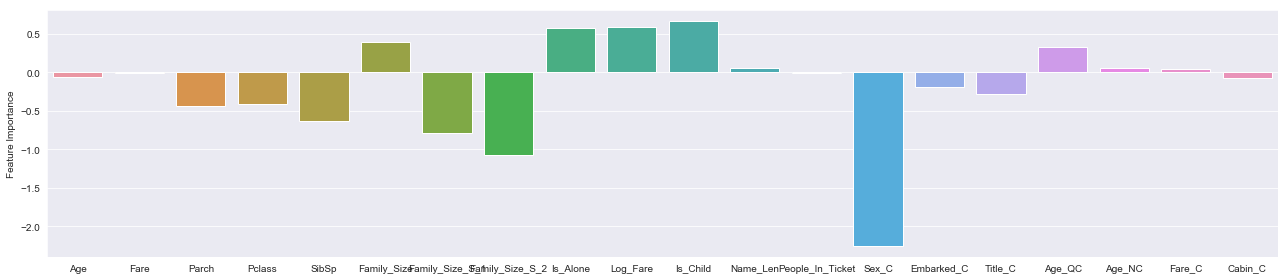

In [12]:
plt.figure(figsize=(18,4))
sns.barplot(x=feature_importances.index,y="Feature Importance",data=feature_importances)#.sort_values(by="Feature Importance",ascending=False)
plt.tight_layout()

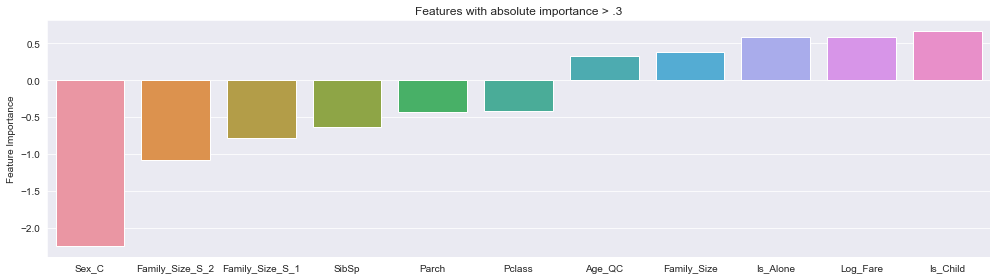

In [13]:
plt.figure(figsize=(14,4))
plt.title("Features with absolute importance > .3")
feature_importances = feature_importances[abs(feature_importances["Feature Importance"]) > .3].sort_values(by="Feature Importance",ascending=True)
sns.barplot(x=feature_importances.index,y="Feature Importance",data=feature_importances)
plt.tight_layout()

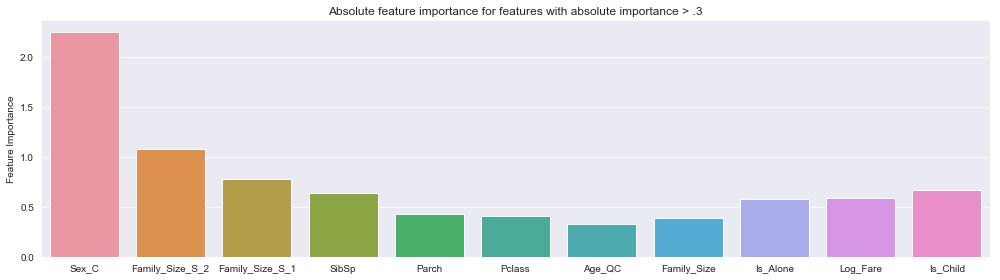

In [14]:
plt.figure(figsize=(14,4))
plt.title("Absolute feature importance for features with absolute importance > .3")
sns.barplot(x=feature_importances.index,y="Feature Importance",data=abs(feature_importances))
plt.tight_layout()

In [19]:
algs = [LogisticRegression(),
       RidgeClassifier(),
       GaussianNB(),
       KNeighborsClassifier(),
       LinearSVC(),
       SVC(),
       DecisionTreeClassifier(),
       ExtraTreeClassifier()
       ]

compare_table = pd.DataFrame(columns=['Algorithm Name', 'Train Accuracy Mean', 'Test Accuracy Mean','Run Time'])

for i,model in enumerate(algs):
    compare_table.loc[i,"Algorithm Name"] = model.__class__.__name__
    results = cross_validate(model,X,y,scoring="accuracy",cv=5)
    compare_table.loc[i,"Train Accuracy Mean"] = results["train_score"].mean()
    compare_table.loc[i,"Test Accuracy Mean"] = results["test_score"].mean()
    compare_table.loc[i,"Run Time"] = results["fit_time"].mean()

compare_table.sort_values(by="Test Accuracy Mean",ascending=False)

,Algorithm Name,Train Accuracy Mean,Test Accuracy Mean,Run Time
1,RidgeClassifier,0.824076,0.812558,0.00523872
0,LogisticRegression,0.822391,0.81146,0.00837827
2,GaussianNB,0.77105,0.766736,0.00438519
7,ExtraTreeClassifier,0.997474,0.763271,0.00270753
6,DecisionTreeClassifier,0.997474,0.752015,0.00515008
4,LinearSVC,0.750048,0.738241,0.0555923
3,KNeighborsClassifier,0.819584,0.728527,0.00282073
5,SVC,0.935748,0.698151,0.0311222
